In [1]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


In [2]:
file_path = "/content/gdrive/MyDrive/Colab Notebooks/DL07_K299_LyQuocHongPhuc/Project2"

In [3]:
!pip install underthesea

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.9/20.9 MB 34.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 657.8/657.8 kB 28.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 30.5 MB/s eta 0:00:00


### Giới thiệu Project: Xây dựng Hệ thống Recommender System cho HASAKI.VN
#### Business Objective/Problem
HASAKI.VN là hệ thống cửa hàng mỹ phẩm chính hãng và dịch vụ chăm sóc sắc đẹp chuyên sâu, với mạng lưới cửa hàng trên toàn quốc. Đây là đối tác phân phối chiến lược tại Việt Nam của nhiều thương hiệu lớn trong ngành mỹ phẩm và chăm sóc sắc đẹp.

#### Mục tiêu kinh doanh:

- Tăng doanh số bán hàng trực tuyến.
- Cá nhân hóa trải nghiệm mua sắm của người dùng.
- Gợi ý sản phẩm phù hợp để tăng tỷ lệ chuyển đổi và giữ chân khách hàng.

#### Hiện trạng:
- Người dùng có thể truy cập HASAKI.VN để xem các sản phẩm, đánh giá/nhận xét từ khách hàng khác, và thực hiện mua hàng.
- Giả sử hiện tại HASAKI.VN chưa có hệ thống Recommender System để tự động gợi ý sản phẩm dựa trên sở thích, lịch sử mua hàng, hoặc hành vi của người dùng.


### Triển khai dự án
●Bước 1: Business Understanding
▪ Dựa vào yêu cầu nói trên => xác định vấn đề:
▪ Chưa có hệ thống Recommendation System
→ Mục tiêu/ vấn đề: Xây dựng hệ thống đề xuất để hỗ trợ người dùng nhanh chóng chọn được sản phẩm phù hợp trên Hasaki → Hệ thống sẽ gồm hai mô hình gợi ý chính:
▪ Content-based filtering
▪ Collaborative filtering

●Bước 2: Data Understanding/ Acquire:

▪ Từ mục tiêu/ vấn đề đã xác định: xem xét các dữ liệu cần thiết:

▪ Dữ liệu được cung cấp sẵn gồm có các tập tin:

▪ San_pham.csv: chứa thông tin các sản phẩm

▪ Khach_hang.csv: chứa danh sách khách hàng

▪ Danh_gia : chứa nhận xét, đánh giá các sản phẩm từ khách hàng

●Bước 3: Data preparation/ Prepare

●Bước 4&5: Modeling & Evaluation/ Analyze & Report
=> Tập trung giải quyết hai bài toán

▪ Bài toán 1: Đề xuất người dùng với Content- based filtering

▪ Bài toán 2: Đề xuất người dùng với Collaborative filtering

- Với bài toán 1:

▪ Xây dựng model Content-based filtering

▪ cosine_similarity

▪ Gensim

▪ ...

▪ Thực hiện/ đánh giá kết quả

▪ Kết luận

- Với bài toán 2:

▪ Xây dựng model Collaborative Filtering

▪ pyspark.ml.recommendation.ALS

▪ Surprise

▪ ...

▪ Thực hiện/ đánh giá kết quả

▪ RMSE

▪ Kết luận

●Bước 6: Deployment & Feedback/ Act
▪ Triển khai Recommender System lên website và theo dõi kết quả.

❑Các công việc cần thực hiện:
- Hãy triển khai project trên với các bước theo Data Science Process
- Áp dụng cosine_similarity và genism (content-based filtering)
- Áp dụng pyspark.ml.recommendation.ALS và surprise (Collaborative filtering)
- Đánh giá và report các kết quả
- Làm báo cáo và trình bày cuối tuần theo lịch.

❑Gợi ý:
- Thực hiện việc tìm hiểu các thuộc tính trong dữ liệu, các tiền xử lý, khám phá dữ liệu cần thiết
- Dựa trên các thư viện được gợi ý thực hiện recommendation system.
- Ngoài thư viện được gợi ý và đã thực hiện ở trên, có thuật toán nào khác cho kết quả tốt hơn không? Thực hiện với thuật toán đó (điểm cộng)
- Tổng hợp các kết quả

In [4]:
import pandas as pd
import re
from underthesea import word_tokenize, pos_tag
import regex
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from collections import Counter
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [5]:
# Đọc dữ liệu từ file
#products = pd.read_csv('/Users/anhvupham/Downloads/data/san_pham.csv')
#customers = pd.read_csv('/Users/anhvupham/Downloads/data/Khach_hang.csv')
#reviews = pd.read_csv('/Users/anhvupham/Downloads/data/Danh_gia.csv')

products = pd.read_csv(file_path + '/data/San_pham.csv')
customers = pd.read_csv(file_path + '/data/Khach_hang.csv')
reviews = pd.read_csv(file_path + '/data/Danh_gia.csv')

In [6]:
# Kiểm tra các thuộc tính trong các dữ liệu
print("Thông tin các thuộc tính trong 'San_pham.csv':")
print(products.info())
print("\nThông tin các thuộc tính trong 'Danh_gia.csv':")
print(reviews.info())
print("\nThông tin các thuộc tính trong 'Khach_hang.csv':")
print(customers.info())

Thông tin các thuộc tính trong 'San_pham.csv':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ma_san_pham      1200 non-null   int64  
 1   ten_san_pham     1200 non-null   object 
 2   gia_ban          1200 non-null   int64  
 3   gia_goc          1186 non-null   float64
 4   phan_loai        678 non-null    object 
 5   mo_ta            1200 non-null   object 
 6   diem_trung_binh  1200 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 65.8+ KB
None

Thông tin các thuộc tính trong 'Danh_gia.csv':
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21575 entries, 0 to 21574
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  21575 non-null  int64 
 1   ma_khach_hang       21575 non-null  int64 
 2   noi_dung_bin

In [7]:
n_masanpham=len(products['ma_san_pham'].unique())
n_tensanpham=len(products['ten_san_pham'].unique())

display(n_masanpham, n_tensanpham)

1200

1200

In [8]:
# Kiểm tra số lượng các giá trị trùng lặp trong 'ma_san_pham'
duplicate_products = products[products.duplicated(subset='ma_san_pham', keep=False)]

# In ra các sản phẩm trùng lặp
print("Sản phẩm trùng lặp:")
print(duplicate_products)

Sản phẩm trùng lặp:
Empty DataFrame
Columns: [ma_san_pham, ten_san_pham, gia_ban, gia_goc, phan_loai, mo_ta, diem_trung_binh]
Index: []


#### ma_san_pham nên là một giá trị duy nhất --> Sau khi kiểm tra thì đảm bảo không có giá trị trùng lặp ở ma_san_pham

In [9]:
products

,ma_san_pham,ten_san_pham,gia_ban,gia_goc,phan_loai,mo_ta,diem_trung_binh
0,318900012,Nước Hoa Hồng Klairs Không Mùi Cho Da Nhạy Cảm...,209000,435000.0,2x180ml\n180ml\nKhông Mùi\nCó Mùi Hương,Nước Hoa Hồng Klairs Supple Preparation là dòn...,4.8
1,205100137,"Nước Tẩy Trang L'Oreal Tươi Mát Cho Da Dầu, Hỗ...",147000,229000.0,2x400ml\n95ml\n400ml\nLàm Sạch Sâu\nTươi Mát D...,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,4.7
2,422208973,Sữa Rửa Mặt CeraVe Sạch Sâu Cho Da Thường Đến ...,343000,455000.0,88ml\n236ml\n473ml\nDa khô/Hỗn hợp khô\nDa dầu...,Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...,4.9
3,204900013,Kem Chống Nắng La Roche-Posay Kiểm Soát Dầu SP...,377000,560000.0,2x50ml\n50ml,Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...,4.6
4,253900006,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm SPF 50...,210000,445000.0,20ml\n50ml,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...,4.6
...,...,...,...,...,...,...,...
1195,422219670,Serum Chống Nắng Dưỡng Thể Bioré Peach Pearly ...,185000,259000.0,Light To Medium\nMedium To Tan,Serum Chống Nắng Dưỡng Thể Bioré UV Aqua Rich ...,0.0
1196,226200001,Khăn Tẩy Trang Acnes 20 Miếng,53000,65000.0,NaN,Khăn Giấy Tẩy Trang Acnes Make Up Remover Shee...,3.5
1197,422218200,Mặt Nạ Colorkey Dưỡng Ẩm Sáng Da Với Niacinami...,11000,15000.0,1 miếng\n10 miếng\nDưỡng Ẩm Ngừa Nụn\nDưỡng Ẩm...,Mặt Nạ Colorkey Luminous B5 Facial Mask 25ml l...,4.0
1198,422206775,[Mua 1 Tặng 1] Freeplus Kem Dưỡng Ẩm Màng Nước...,899000,945000.0,NaN,Bộ sản phẩm bao gồm 2 món:\nKem Dưỡng Ẩm Màng ...,0.0


#### Một vài ví dụ của ten_san_pham và mo_ta như:
L'Oreal
[Mua 1 Tặng 1]
50g/Lọ
Tinh Chất Angel's
Sữa Chống Nắng Cetaphil SPF50+ Dịu Lành Cho Bé 150ml (mới)
Sáp Tẩy Trang oh!oh!  

#### Các giá trị trong cột ten_san_pham và mo_ta chứa các thông tin quan trọng như thương hiệu, chương trình khuyến mãi, dung tích, SPF, hoặc các đặc điểm sản phẩm khác, việc loại bỏ ký tự đặc biệtcó thể làm mất thông tin quan trọng và ảnh hưởng đến chất lượng hệ thống Recommendation System. --> Xử lý một cách có chọn lọc và đơn giản

In [10]:
#LOAD wrong words
file = open(file_path + '/files/wrong-word.txt', 'r', encoding="utf8")
wrong_words = file.read().split('\n')
file.close()
#LOAD STOPWORDS
file = open(file_path + '/files/vietnamese-stopwords.txt', 'r', encoding="utf8")
stopwords = file.read().split('\n')
file.close()

In [11]:
#wrong_word_file = '/Users/anhvupham/Downloads/files/wrong-word.txt'
#stopwords_file = '/Users/anhvupham/Downloads/files/vietnamese-stopwords.txt'

In [12]:
# Đọc dữ liệu từ các file
#with open(wrong_word_file, 'r', encoding="utf8") as file:
#    wrong_words = set(file.read().splitlines())

#with open(stopwords_file, 'r', encoding="utf8") as file:
#    stopwords = set(file.read().splitlines())

In [13]:
# Chuẩn hóa các chuỗi (ví dụ: tên sản phẩm, mô tả sản phẩm, loại sản phẩm)
products['ten_san_pham'] = products['ten_san_pham'].str.strip().str.lower()  # Chuyển tên sản phẩm thành chữ thường và loại bỏ khoảng trắng
products['mo_ta'] = products['mo_ta'].str.strip().fillna('')  # Làm sạch mô tả sản phẩm

# Chuyển đổi cột 'gia_goc', 'gia_ban'  sang float nếu có giá trị không hợp lệ
products['gia_ban'] = products['gia_ban'].apply(pd.to_numeric, errors='coerce')
products['gia_goc'] = products['gia_goc'].apply(pd.to_numeric, errors='coerce')

products.head()

,ma_san_pham,ten_san_pham,gia_ban,gia_goc,phan_loai,mo_ta,diem_trung_binh
0,318900012,nước hoa hồng klairs không mùi cho da nhạy cảm...,209000,435000.0,2x180ml\n180ml\nKhông Mùi\nCó Mùi Hương,Nước Hoa Hồng Klairs Supple Preparation là dòn...,4.8
1,205100137,"nước tẩy trang l'oreal tươi mát cho da dầu, hỗ...",147000,229000.0,2x400ml\n95ml\n400ml\nLàm Sạch Sâu\nTươi Mát D...,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,4.7
2,422208973,sữa rửa mặt cerave sạch sâu cho da thường đến ...,343000,455000.0,88ml\n236ml\n473ml\nDa khô/Hỗn hợp khô\nDa dầu...,Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...,4.9
3,204900013,kem chống nắng la roche-posay kiểm soát dầu sp...,377000,560000.0,2x50ml\n50ml,Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...,4.6
4,253900006,kem chống nắng skin1004 cho da nhạy cảm spf 50...,210000,445000.0,20ml\n50ml,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...,4.6


In [14]:
# Kiểm tra giá trị thiếu
print("Giá trị thiếu trong sản phẩm:")
print(products.isnull().sum())

Giá trị thiếu trong sản phẩm:
ma_san_pham          0
ten_san_pham         0
gia_ban              0
gia_goc             14
phan_loai          522
mo_ta                0
diem_trung_binh      0
dtype: int64


In [15]:
# Kiểm tra và đếm số lượng giá trị âm trong các cột 'gia_ban' và 'gia_goc'
negative_values_gia_ban = len(products[products['gia_ban'] < 0])
negative_values_gia_goc = len(products[products['gia_goc'] < 0])

print(f"Số lượng giá trị âm trong 'gia_ban': {negative_values_gia_ban}")
print(f"Số lượng giá trị âm trong 'gia_goc': {negative_values_gia_goc}")


Số lượng giá trị âm trong 'gia_ban': 0
Số lượng giá trị âm trong 'gia_goc': 0


In [16]:
# Kiểm tra lại các giá trị sau khi xử lý
print(products[['gia_ban', 'gia_goc']].describe())

            gia_ban       gia_goc
count  1.200000e+03  1.186000e+03
mean   2.777625e+05  3.879583e+05
std    2.501226e+05  3.352643e+05
min    8.000000e+03  1.500000e+04
25%    9.875000e+04  1.490000e+05
50%    2.270000e+05  3.250000e+05
75%    3.730000e+05  5.250000e+05
max    2.125000e+06  2.500000e+06


##### Content-based Filtering trong hệ thống gợi ý và có cột phan_loai (phân loại sản phẩm) với 522 giá trị thiếu, việc xử lý thiếu này là rất quan trọng để đảm bảo mô hình hoạt động hiệu quả. Content-based Filtering dựa vào các đặc trưng của sản phẩm như mô tả (mo_ta), phân loại (phan_loai), và các thuộc tính khác để tính toán độ tương đồng giữa các sản phẩm và gợi ý sản phẩm tương tự cho người dùng. --> thay thế các giá trị thiếu bằng một giá trị mặc định hoặc một phân loại chung như "Không xác định" hoặc "Chưa phân loại".

In [17]:
# Xử lý giá trị thiếu cho bảng 'San_pham.csv'
# Thay thế các giá trị thiếu trong cột 'phan_loai' bằng 'Không xác định'
products['phan_loai'].fillna('Không xác định', inplace=True)

# Thay thế các giá trị thiếu trong cột 'gia_goc' bằng giá trị trung bình
mean_gia_goc = products['gia_goc'].mean()
products['gia_goc'].fillna(mean_gia_goc, inplace=True)

# Kiểm tra lại giá trị thiếu sau khi xử lý trong bảng 'San_pham.csv'
missing_values_after = products.isnull().sum()


# In kết quả kiểm tra giá trị thiếu sau khi xử lý
print("Giá trị thiếu sau khi xử lý trong bảng sản phẩm (San_pham.csv):")
print(missing_values_after)

Giá trị thiếu sau khi xử lý trong bảng sản phẩm (San_pham.csv):
ma_san_pham        0
ten_san_pham       0
gia_ban            0
gia_goc            0
phan_loai          0
mo_ta              0
diem_trung_binh    0
dtype: int64


<ipython-input-17-2e9ea375a485>:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  products['phan_loai'].fillna('Không xác định', inplace=True)
<ipython-input-17-2e9ea375a485>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True

Tuy nhiên Cột phân loại có các giá trị ví dụ như sau:
phan_loai
"50 tờ
 100 tờ"
"Vitamin C
 Rau Má"
"75ml
 500ml"
"75ml
 500ml"
"1 miếng
 5 miếng
 Dưỡng Sáng Da
 Dưỡng Ẩm"
"Phiên Bản Cũ
 Phiên Bản Mới"
"Có Hộp
 Không hộp"
"140ml
 310ml"
"140ml
 310ml"
"2x150g
 150g"
"Phiên Bản Cũ
 Phiên Bản Mới"
"Tươi Mát Da
 Làm Sạch Sâu
 Căng Mịn Da
 Dưỡng Ẩm
 Kiềm Dầu"
"2x150g
 150g"
"140ml + 70ml
 500ml + 70ml"
"12.5ml
 30ml
 Vitamin C 10%
 Vitamin C 15%"
"12.5ml
 30ml
 Vitamin C 10%
 Vitamin C 15%"
"75ml
 150ml"
"2x50ml
 50ml"
"2x50ml
 50ml"

 không nhất quán và chứa nhiều giá trị lạ, chẳng hạn như kết hợp giữa kích thước sản phẩm, số lượng, và tính năng (ví dụ, "Vitamin C", "Dưỡng Sáng Da"). Điều này làm cho việc phân nhóm chính xác theo cột phan_loai trở nên khó khăn và không đáng tin cậy cho hệ thống gợi ý, đặc biệt khi cột này có quá nhiều sự kết hợp phức tạp.

In [18]:
# Kiểm tra số lượng giá trị bằng 0 trong cột 'diem_trung_binh'
zero_ratings = len(products[products['diem_trung_binh'] == 0])
# In kết quả
display(zero_ratings)

161

#### Vấn đề khi thay thế điểm 0 bằng giá trị trung bình:
- Giới thiệu sản phẩm không hợp lệ:
Khi thay thế điểm 0 (không có đánh giá hoặc đánh giá không đáng tin cậy) bằng giá trị trung bình, bạn có thể gợi ý sản phẩm không thực sự phổ biến hoặc có điểm đánh giá không chính xác. Điều này có thể làm sai lệch kết quả gợi ý vì hệ thống sẽ tính toán độ tương đồng giữa các sản phẩm dựa trên điểm giả định.
- Gợi ý không chính xác:
Hệ thống có thể gợi ý các sản phẩm có điểm trung bình giả tạo, dẫn đến việc các sản phẩm mới hoặc ít được đánh giá có thể nhận được điểm cao hơn thực tế và xuất hiện trong danh sách gợi ý.

#### Cách xử lý cho hệ thống gợi ý:
1. Collaborative Filtering (Collaborative Filtering - ALS, KNN):

Đối với Collaborative Filtering, có thể xử lý sản phẩm không có đánh giá thông qua kỹ thuật xử lý thiếu dữ liệu (SVD, ALS, KNN), vì những sản phẩm chưa có đánh giá sẽ không tham gia vào việc tính toán độ tương đồng, hoặc sẽ sử dụng thông tin từ những sản phẩm có đánh giá.

2. Content-based Filtering (Content-based - TF-IDF, Word2Vec):

Content-based Filtering có thể gợi ý sản phẩm mà không dựa vào điểm đánh giá, chỉ sử dụng mô tả sản phẩm, tên sản phẩm, phân loại, v.v. Điều này giúp giải quyết vấn đề sản phẩm chưa có đánh giá.

In [19]:
print("\nGiá trị thiếu trong đánh giá:")
print(reviews.isnull().sum())


Giá trị thiếu trong đánh giá:
id                      0
ma_khach_hang           0
noi_dung_binh_luan    901
ngay_binh_luan          0
gio_binh_luan           0
so_sao                  0
ma_san_pham             0
dtype: int64


In [20]:
# Loại bỏ đánh giá với số sao = 0
reviews = reviews[reviews['so_sao'] > 0]

# Kiểm tra lại giá trị thiếu sau khi xử lý trong bảng 'Danh_gia.csv'
missing_values_reviews_after = reviews.isnull().sum()

print("\nGiá trị thiếu sau khi xử lý trong bảng đánh giá (Danh_gia.csv):")
print(missing_values_reviews_after)



Giá trị thiếu sau khi xử lý trong bảng đánh giá (Danh_gia.csv):
id                      0
ma_khach_hang           0
noi_dung_binh_luan    899
ngay_binh_luan          0
gio_binh_luan           0
so_sao                  0
ma_san_pham             0
dtype: int64


In [21]:
print("\nGiá trị thiếu trong khách hàng:")
print(customers.isnull().sum())


Giá trị thiếu trong khách hàng:
ma_khach_hang    0
ho_ten           1
dtype: int64


In [22]:
# Số lượng đánh giá cho mỗi sản phẩm
product_ratings_count = products.groupby('ma_san_pham')['diem_trung_binh'].count().sort_values(ascending=False)
print("\nSố lượng đánh giá cho mỗi sản phẩm:")
print(product_ratings_count.head(10))  # Hiển thị 10 sản phẩm có nhiều đánh giá nhất


Số lượng đánh giá cho mỗi sản phẩm:
ma_san_pham
100100001    1
422209262    1
422209254    1
422209235    1
422209215    1
422209198    1
422209173    1
422209134    1
422209132    1
422209095    1
Name: diem_trung_binh, dtype: int64


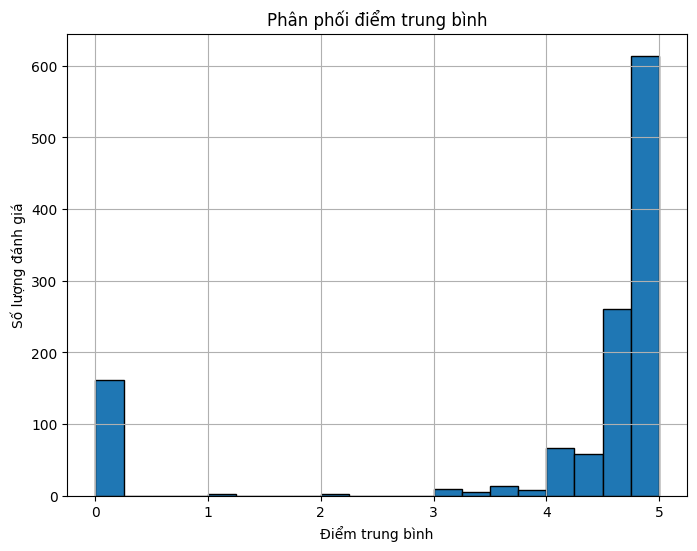

In [23]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
products['diem_trung_binh'].hist(bins=20, edgecolor='black')
plt.title("Phân phối điểm trung bình")
plt.xlabel("Điểm trung bình")
plt.ylabel("Số lượng đánh giá")
plt.show()

In [24]:
# Sắp xếp sản phẩm theo điểm trung bình
top_rated_products = products.sort_values('diem_trung_binh', ascending=False)
print("\nSản phẩm có điểm đánh giá cao nhất:")
print(top_rated_products[['ten_san_pham', 'diem_trung_binh']].head(10))  # Hiển thị 10 sản phẩm có điểm đánh giá cao nhất


Sản phẩm có điểm đánh giá cao nhất:
                                           ten_san_pham  diem_trung_binh
1199  lotion curél dưỡng ẩm chuyên sâu cho da lão hó...              5.0
789      dầu tẩy trang kosé softymo dưỡng sáng da 230ml              5.0
791                       cây nặn mụn vacosi 2 đầu nm01              5.0
792   nước tẩy trang swiss image 3 trong 1 sạch sâu ...              5.0
793            sữa rửa mặt ducray cho da nhờn mụn 200ml              5.0
794   tinh chất chống nắng eucerin nâng tông & dưỡng...              5.0
306    sữa dưỡng ẩm ban đêm cerave dành cho da mặt 52ml              5.0
795   kem chống nắng la roche-posay nâng tông sáng á...              5.0
796   mặt nạ sur.medic+ cấp nước & cấp ẩm chuyên sâu...              5.0
798   combo 10 mặt nạ wonjin siêu tinh chất nâng cơ,...              5.0


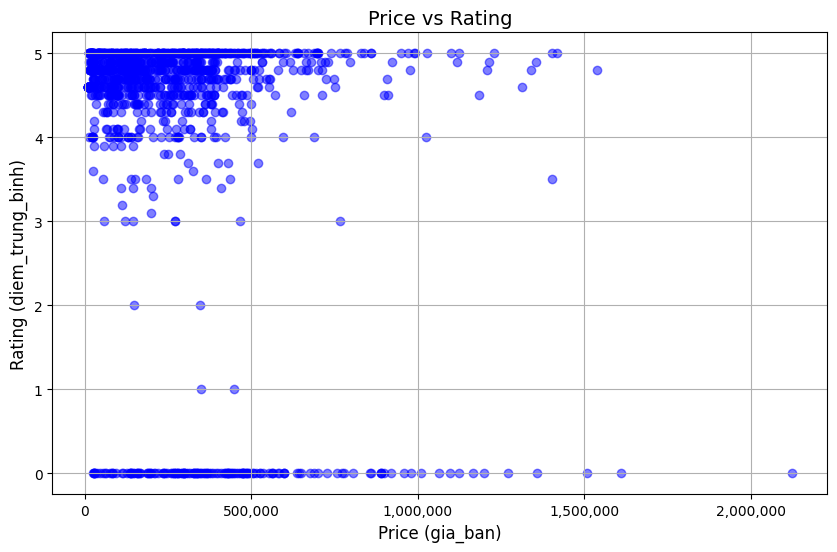

In [25]:
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter

# Visualize Price vs Rating
plt.figure(figsize=(10, 6))
plt.scatter(products['gia_ban'], products['diem_trung_binh'], alpha=0.5, color='blue')
plt.title('Price vs Rating', fontsize=14)
plt.xlabel('Price (gia_ban)', fontsize=12)
plt.ylabel('Rating (diem_trung_binh)', fontsize=12)
# Định dạng trục x để hiển thị giá trị với dấu phẩy
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.grid(True)
plt.show()

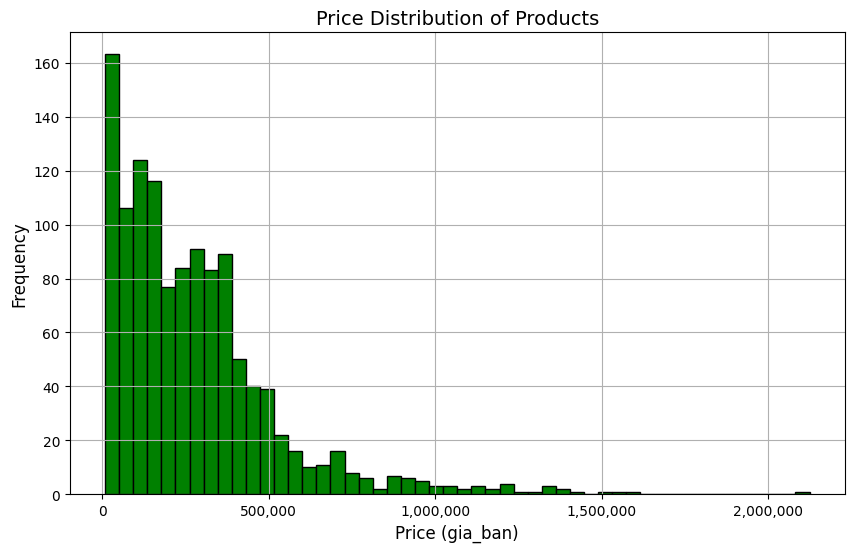

In [26]:
# Plotting price distribution
from matplotlib.ticker import FuncFormatter

plt.figure(figsize=(10, 6))
plt.hist(products['gia_ban'], bins=50, color='green', edgecolor='black')
plt.title('Price Distribution of Products', fontsize=14)
plt.xlabel('Price (gia_ban)', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
# Định dạng trục x để hiển thị giá trị với dấu phẩy
formatter = FuncFormatter(lambda x, _: f'{x:,.0f}')
plt.gca().xaxis.set_major_formatter(formatter)
plt.grid(True)
plt.show()

#### Giá bán càng cào thì độ mua càng thấp. Các sản phẩm đa số ở tầm mức dưới 500k, cao mạnht ở 8k, 10k

In [27]:
# ví dụ ở đây là chọn 1 cột, và chỉ lấy 200 từ đầu tiên trong phần mô tả (dễ quan sát khi làm demo)
products['content'] = products['mo_ta'].apply(lambda x: ' '.join(x.split()[:200]))
products.head()

,ma_san_pham,ten_san_pham,gia_ban,gia_goc,phan_loai,mo_ta,diem_trung_binh,content
0,318900012,nước hoa hồng klairs không mùi cho da nhạy cảm...,209000,435000.0,2x180ml\n180ml\nKhông Mùi\nCó Mùi Hương,Nước Hoa Hồng Klairs Supple Preparation là dòn...,4.8,Nước Hoa Hồng Klairs Supple Preparation là dòn...
1,205100137,"nước tẩy trang l'oreal tươi mát cho da dầu, hỗ...",147000,229000.0,2x400ml\n95ml\n400ml\nLàm Sạch Sâu\nTươi Mát D...,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,4.7,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...
2,422208973,sữa rửa mặt cerave sạch sâu cho da thường đến ...,343000,455000.0,88ml\n236ml\n473ml\nDa khô/Hỗn hợp khô\nDa dầu...,Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...,4.9,Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...
3,204900013,kem chống nắng la roche-posay kiểm soát dầu sp...,377000,560000.0,2x50ml\n50ml,Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...,4.6,Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...
4,253900006,kem chống nắng skin1004 cho da nhạy cảm spf 50...,210000,445000.0,20ml\n50ml,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...,4.6,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...


In [28]:
# word_tokenize
products["content_wt"]=products["content"].apply(lambda x: word_tokenize(x, format="text"))

In [29]:
products[["content", "content_wt"]].head(2)

,content,content_wt
0,Nước Hoa Hồng Klairs Supple Preparation là dòn...,Nước Hoa_Hồng Klairs_Supple Preparation là dòn...
1,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,Nước Tẩy_Trang L'Oréal là dòng sản_phẩm tẩy_tr...


In [30]:
products

,ma_san_pham,ten_san_pham,gia_ban,gia_goc,phan_loai,mo_ta,diem_trung_binh,content,content_wt
0,318900012,nước hoa hồng klairs không mùi cho da nhạy cảm...,209000,435000.0,2x180ml\n180ml\nKhông Mùi\nCó Mùi Hương,Nước Hoa Hồng Klairs Supple Preparation là dòn...,4.8,Nước Hoa Hồng Klairs Supple Preparation là dòn...,Nước Hoa_Hồng Klairs_Supple Preparation là dòn...
1,205100137,"nước tẩy trang l'oreal tươi mát cho da dầu, hỗ...",147000,229000.0,2x400ml\n95ml\n400ml\nLàm Sạch Sâu\nTươi Mát D...,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,4.7,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,Nước Tẩy_Trang L'Oréal là dòng sản_phẩm tẩy_tr...
2,422208973,sữa rửa mặt cerave sạch sâu cho da thường đến ...,343000,455000.0,88ml\n236ml\n473ml\nDa khô/Hỗn hợp khô\nDa dầu...,Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...,4.9,Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...,Sữa Rửa Mặt_Cerave Sạch_Sâu là sản_phẩm sữa_rử...
3,204900013,kem chống nắng la roche-posay kiểm soát dầu sp...,377000,560000.0,2x50ml\n50ml,Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...,4.6,Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...,Kem chống nắng giúp bảo_vệ da khỏi tia UVB & U...
4,253900006,kem chống nắng skin1004 cho da nhạy cảm spf 50...,210000,445000.0,20ml\n50ml,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...,4.6,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...,Kem Chống Nắng_Skin1004 Cho_Da Nhạy_Cảm là sản...
...,...,...,...,...,...,...,...,...,...
1195,422219670,serum chống nắng dưỡng thể bioré peach pearly ...,185000,259000.0,Light To Medium\nMedium To Tan,Serum Chống Nắng Dưỡng Thể Bioré UV Aqua Rich ...,0.0,Serum Chống Nắng Dưỡng Thể Bioré UV Aqua Rich ...,Serum Chống Nắng Dưỡng_Thể Bioré_UV Aqua_Rich ...
1196,226200001,khăn tẩy trang acnes 20 miếng,53000,65000.0,Không xác định,Khăn Giấy Tẩy Trang Acnes Make Up Remover Shee...,3.5,Khăn Giấy Tẩy Trang Acnes Make Up Remover Shee...,Khăn Giấy Tẩy_Trang Acnes_Make Up_Remover Shee...
1197,422218200,mặt nạ colorkey dưỡng ẩm sáng da với niacinami...,11000,15000.0,1 miếng\n10 miếng\nDưỡng Ẩm Ngừa Nụn\nDưỡng Ẩm...,Mặt Nạ Colorkey Luminous B5 Facial Mask 25ml l...,4.0,Mặt Nạ Colorkey Luminous B5 Facial Mask 25ml l...,Mặt_Nạ Colorkey_Luminous B5_Facial Mask 25 ml ...
1198,422206775,[mua 1 tặng 1] freeplus kem dưỡng ẩm màng nước...,899000,945000.0,Không xác định,Bộ sản phẩm bao gồm 2 món:\nKem Dưỡng Ẩm Màng ...,0.0,Bộ sản phẩm bao gồm 2 món: Kem Dưỡng Ẩm Màng N...,Bộ sản_phẩm bao_gồm 2 món : Kem_Dưỡng Ẩm_Màng ...


#### Một vài ví dụ của mo_ta như:
L'Oreal
50g/Lọ
Tinh Chất Angel's
Sữa Chống Nắng Cetaphil SPF50+ Dịu Lành Cho Bé 150ml (mới)
Sáp Tẩy Trang oh!oh!  

#### Các giá trị trong cột  mo_ta chứa các thông tin quan trọng như thương hiệu, chương trình khuyến mãi, dung tích, SPF, hoặc các đặc điểm sản phẩm khác, việc loại bỏ ký tự đặc biệtcó thể làm mất thông tin quan trọng và ảnh hưởng đến chất lượng hệ thống Recommendation System. --> Xử lý một cách có chọn lọc và đơn giản

### Gemsim

In [31]:
# Tokenize(split) the sentences into words
content_gem = [[text for text in x.split()] for x in products.content_wt]

In [32]:
len(content_gem)

1200

In [33]:
content_gem[:1]

[['Nước',
  'Hoa_Hồng',
  'Klairs_Supple',
  'Preparation',
  'là',
  'dòng',
  'sản_phẩm',
  'toner',
  'được',
  'thương_hiệu',
  'Dear',
  ',',
  'Klairs',
  'thiết_kế',
  'chuyên_biệt',
  'dành',
  'cho',
  'làn',
  'da',
  'nhạy_cảm',
  '.',
  'Với',
  'bảng',
  'thành_phần',
  'chiết_xuất',
  'từ',
  'thực_vật',
  'và',
  'kết_cấu',
  'lỏng',
  'nhẹ',
  ',',
  'thấm',
  'nhanh',
  'trên',
  'da',
  ',',
  'nước',
  'hoa_hồng',
  'Klairs',
  'sẽ',
  'giúp',
  'cân_bằng',
  'độ_pH',
  'và',
  'cấp',
  'ẩm',
  'cho',
  'làn',
  'da',
  'hiệu_quả',
  ',',
  'hỗ_trợ',
  'cho',
  'các',
  'bước',
  'skincare',
  'tiếp_theo',
  'đạt',
  'hiệu_quả',
  'tối_ưu',
  '.',
  'Hiện',
  'sản_phẩm',
  'Nước_Hoa_Hồng_Klairs',
  'Cho_Da',
  'Nhạy_Cảm',
  '180',
  'ml',
  'đã',
  'có_mặt',
  'tại',
  'Hasaki',
  'với',
  '2',
  'loại',
  ':',
  'Nước_Hoa_Hồng',
  'Klairs_Supple',
  'Preparation',
  'Facial_Toner',
  ':',
  'dành',
  'cho',
  'da',
  'nhạy_cảm',
  '(',
  'hương',
  'thảo_mộc',
  ')'

In [34]:
import re
# Tiền xử lý dữ liệu
content_gem_re = [[t for t in text if not t in stopwords] for text in content_gem] # stopword
# Thực hiện các tiền xử lý khác...
# Nên viết phần tiền xử lý này vào function để có thể tái sử dụng khi cần

In [35]:
content_gem_re[:1]

[['Nước',
  'Hoa_Hồng',
  'Klairs_Supple',
  'Preparation',
  'dòng',
  'sản_phẩm',
  'toner',
  'thương_hiệu',
  'Dear',
  ',',
  'Klairs',
  'thiết_kế',
  'chuyên_biệt',
  'làn',
  'da',
  'nhạy_cảm',
  '.',
  'Với',
  'bảng',
  'thành_phần',
  'chiết_xuất',
  'thực_vật',
  'kết_cấu',
  'lỏng',
  'nhẹ',
  ',',
  'thấm',
  'da',
  ',',
  'hoa_hồng',
  'Klairs',
  'giúp',
  'cân_bằng',
  'độ_pH',
  'ẩm',
  'làn',
  'da',
  'hiệu_quả',
  ',',
  'skincare',
  'hiệu_quả',
  'tối_ưu',
  '.',
  'Hiện',
  'sản_phẩm',
  'Nước_Hoa_Hồng_Klairs',
  'Cho_Da',
  'Nhạy_Cảm',
  '180',
  'ml',
  'có_mặt',
  'Hasaki',
  '2',
  ':',
  'Nước_Hoa_Hồng',
  'Klairs_Supple',
  'Preparation',
  'Facial_Toner',
  ':',
  'da',
  'nhạy_cảm',
  '(',
  'hương',
  'thảo_mộc',
  ')',
  '.',
  'Nước_Hoa_Hồng',
  'Klairs_Supple',
  'Preparation',
  'Unscented_Toner',
  ':',
  'da',
  'siêu_nhạy_cảm',
  '(',
  'không',
  'mùi',
  ')',
  '.',
  '1',
  '.',
  'Nước',
  'hoa_hồng',
  'Dear',
  ',',
  'Klairs_Supple',
  '

In [36]:
# Obtain the number of features based on dictionary: Use corpora.Dictionary
import warnings
from gensim import corpora, models, similarities
dictionary = corpora.Dictionary(content_gem_re)

In [37]:
feature_cnt = len(dictionary.token2id)

In [38]:
feature_cnt

6144

In [39]:
# Obtain corpus based on dictionary (dense matrix)
corpus = [dictionary.doc2bow(text) for text in content_gem_re]

In [40]:
corpus[0] # id, so lan xuat hien cua token trong van ban/ san pham

[(0, 2),
 (1, 2),
 (2, 11),
 (3, 6),
 (4, 1),
 (5, 2),
 (6, 1),
 (7, 3),
 (8, 1),
 (9, 3),
 (10, 2),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 2),
 (15, 5),
 (16, 1),
 (17, 1),
 (18, 2),
 (19, 2),
 (20, 1),
 (21, 4),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 2),
 (30, 1),
 (31, 1),
 (32, 6),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 2),
 (39, 3),
 (40, 1),
 (41, 1),
 (42, 3),
 (43, 1),
 (44, 2),
 (45, 2),
 (46, 2),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 2),
 (51, 1),
 (52, 2),
 (53, 2),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 3),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 2),
 (69, 1),
 (70, 1),
 (71, 1),
 (72, 1),
 (73, 1)]

In [41]:
# Use TF-IDF Model to process corpus, obtaining index
tfidf = models.TfidfModel(corpus)
# tính toán sự tương tự trong ma trận thưa thớt
index = similarities.SparseMatrixSimilarity(tfidf[corpus],
                                            num_features = feature_cnt)
# ma tran: n x n

In [42]:
products_1 = pd.DataFrame(index)
products_1

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,1.000000,0.026826,0.018632,0.013689,0.037349,0.043826,0.001069,0.043826,0.002658,0.026826,...,0.008210,0.021965,0.004122,0.026826,0.016311,0.004113,0.003666,0.006526,0.045581,0.016715
1,0.026826,1.000000,0.025963,0.017349,0.051726,0.104737,0.052364,0.104737,0.004850,1.000000,...,0.052058,0.016563,0.028479,1.000000,0.009484,0.013572,0.058312,0.003872,0.030007,0.051036
2,0.018632,0.025963,1.000000,0.024698,0.006830,0.067988,0.009620,0.067988,0.010676,0.025963,...,0.009527,0.011783,0.004379,0.025963,0.011308,0.010654,0.026767,0.008556,0.035138,0.014336
3,0.013689,0.017349,0.024698,1.000000,0.172299,0.020838,0.067747,0.020838,0.095085,0.017349,...,0.063025,0.174617,0.006687,0.017349,0.081179,0.031768,0.014010,0.004910,0.025608,0.038557
4,0.037349,0.051726,0.006830,0.172299,1.000000,0.050897,0.089959,0.050897,0.062990,0.051726,...,0.027688,0.103418,0.004573,0.051726,0.134376,0.040838,0.011039,0.000573,0.060413,0.034131
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.004113,0.013572,0.010654,0.031768,0.040838,0.013458,0.238923,0.013458,0.404685,0.013572,...,0.013703,0.088111,0.001908,0.013572,0.123381,1.000000,0.003528,0.007492,0.019698,0.019272
1196,0.003666,0.058312,0.026767,0.014010,0.011039,0.037673,0.012708,0.037673,0.005967,0.058312,...,0.012156,0.004567,0.060950,0.058312,0.007455,0.003528,1.000000,0.001235,0.004709,0.014531
1197,0.006526,0.003872,0.008556,0.004910,0.000573,0.019416,0.004557,0.019416,0.006807,0.003872,...,0.002535,0.013264,0.000259,0.003872,0.027125,0.007492,0.001235,1.000000,0.006136,0.005680
1198,0.045581,0.030007,0.035138,0.025608,0.060413,0.028095,0.016500,0.028095,0.044251,0.030007,...,0.033351,0.029936,0.016105,0.030007,0.039303,0.019698,0.004709,0.006136,1.000000,0.021629


In [43]:
content_gem_re[:1]

[['Nước',
  'Hoa_Hồng',
  'Klairs_Supple',
  'Preparation',
  'dòng',
  'sản_phẩm',
  'toner',
  'thương_hiệu',
  'Dear',
  ',',
  'Klairs',
  'thiết_kế',
  'chuyên_biệt',
  'làn',
  'da',
  'nhạy_cảm',
  '.',
  'Với',
  'bảng',
  'thành_phần',
  'chiết_xuất',
  'thực_vật',
  'kết_cấu',
  'lỏng',
  'nhẹ',
  ',',
  'thấm',
  'da',
  ',',
  'hoa_hồng',
  'Klairs',
  'giúp',
  'cân_bằng',
  'độ_pH',
  'ẩm',
  'làn',
  'da',
  'hiệu_quả',
  ',',
  'skincare',
  'hiệu_quả',
  'tối_ưu',
  '.',
  'Hiện',
  'sản_phẩm',
  'Nước_Hoa_Hồng_Klairs',
  'Cho_Da',
  'Nhạy_Cảm',
  '180',
  'ml',
  'có_mặt',
  'Hasaki',
  '2',
  ':',
  'Nước_Hoa_Hồng',
  'Klairs_Supple',
  'Preparation',
  'Facial_Toner',
  ':',
  'da',
  'nhạy_cảm',
  '(',
  'hương',
  'thảo_mộc',
  ')',
  '.',
  'Nước_Hoa_Hồng',
  'Klairs_Supple',
  'Preparation',
  'Unscented_Toner',
  ':',
  'da',
  'siêu_nhạy_cảm',
  '(',
  'không',
  'mùi',
  ')',
  '.',
  '1',
  '.',
  'Nước',
  'hoa_hồng',
  'Dear',
  ',',
  'Klairs_Supple',
  '

In [44]:
view_content = content_gem_re[:1][0]

In [45]:
# Convert search words into Sparse Vectors
kw_vector = dictionary.doc2bow(view_content)

In [46]:
kw_vector

[(0, 2),
 (1, 2),
 (2, 11),
 (3, 6),
 (4, 1),
 (5, 2),
 (6, 1),
 (7, 3),
 (8, 1),
 (9, 3),
 (10, 2),
 (11, 1),
 (12, 1),
 (13, 1),
 (14, 2),
 (15, 5),
 (16, 1),
 (17, 1),
 (18, 2),
 (19, 2),
 (20, 1),
 (21, 4),
 (22, 1),
 (23, 1),
 (24, 1),
 (25, 1),
 (26, 1),
 (27, 1),
 (28, 1),
 (29, 2),
 (30, 1),
 (31, 1),
 (32, 6),
 (33, 1),
 (34, 1),
 (35, 1),
 (36, 1),
 (37, 1),
 (38, 2),
 (39, 3),
 (40, 1),
 (41, 1),
 (42, 3),
 (43, 1),
 (44, 2),
 (45, 2),
 (46, 2),
 (47, 1),
 (48, 1),
 (49, 1),
 (50, 2),
 (51, 1),
 (52, 2),
 (53, 2),
 (54, 1),
 (55, 1),
 (56, 1),
 (57, 1),
 (58, 1),
 (59, 3),
 (60, 1),
 (61, 1),
 (62, 1),
 (63, 1),
 (64, 1),
 (65, 1),
 (66, 1),
 (67, 1),
 (68, 2),
 (69, 1),
 (70, 1),
 (71, 1),
 (72, 1),
 (73, 1)]

In [47]:
# similarity calculation
sim = index[tfidf[kw_vector]]

In [48]:
# order by sim
sim_sort = sorted(enumerate(sim), key=lambda item: -item[1])
print(sim_sort)

[(0, 0.9999999), (97, 0.9999999), (600, 0.52205276), (119, 0.13098744), (67, 0.12896606), (262, 0.10154774), (487, 0.0950882), (310, 0.09483278), (36, 0.09455728), (773, 0.08823608), (1041, 0.07863144), (841, 0.07783657), (1144, 0.07783657), (104, 0.076867014), (607, 0.076779425), (700, 0.076779425), (960, 0.076779425), (1122, 0.076779425), (373, 0.07590778), (560, 0.07566972), (779, 0.075304665), (835, 0.075304665), (1180, 0.075304665), (973, 0.07448916), (921, 0.074229814), (91, 0.07092506), (622, 0.07009328), (210, 0.06948803), (321, 0.067783706), (821, 0.067783706), (623, 0.06426667), (1110, 0.06426667), (248, 0.06288525), (1077, 0.06288525), (763, 0.059354614), (465, 0.05842331), (195, 0.058222353), (197, 0.055286158), (1043, 0.055286158), (627, 0.054629296), (48, 0.054148063), (376, 0.054148063), (436, 0.054148063), (14, 0.054060217), (31, 0.054060217), (409, 0.054060217), (29, 0.05400088), (85, 0.05400088), (137, 0.05400088), (244, 0.05400088), (1174, 0.053362705), (930, 0.05316

In [49]:
# print sim_sort line by line
for item in sim_sort:
    print('keyword is similar to doc_index %d: %.4f' % (item[0], item[1]))

keyword is similar to doc_index 0: 1.0000
keyword is similar to doc_index 97: 1.0000
keyword is similar to doc_index 600: 0.5221
keyword is similar to doc_index 119: 0.1310
keyword is similar to doc_index 67: 0.1290
keyword is similar to doc_index 262: 0.1015
keyword is similar to doc_index 487: 0.0951
keyword is similar to doc_index 310: 0.0948
keyword is similar to doc_index 36: 0.0946
keyword is similar to doc_index 773: 0.0882
keyword is similar to doc_index 1041: 0.0786
keyword is similar to doc_index 841: 0.0778
keyword is similar to doc_index 1144: 0.0778
keyword is similar to doc_index 104: 0.0769
keyword is similar to doc_index 607: 0.0768
keyword is similar to doc_index 700: 0.0768
keyword is similar to doc_index 960: 0.0768
keyword is similar to doc_index 1122: 0.0768
keyword is similar to doc_index 373: 0.0759
keyword is similar to doc_index 560: 0.0757
keyword is similar to doc_index 779: 0.0753
keyword is similar to doc_index 835: 0.0753
keyword is similar to doc_index 11

In [50]:
# Giả sử 3 sản phẩm liên quan nhất với sản phẩm có index đầu tiên
content_famillier = products.iloc[[14, 11, 12]]

In [51]:
content_famillier

,ma_san_pham,ten_san_pham,gia_ban,gia_goc,phan_loai,mo_ta,diem_trung_binh,content,content_wt
14,422204884,combo 2 nước tẩy trang bí đao cocoon làm sạch ...,295000,590000.0,2x500ml\n2x140ml\n140ml\n500ml\n500+140ml,Nước Tẩy Trang Bí Đao Cocoon Winter Melon Mice...,4.9,Nước Tẩy Trang Bí Đao Cocoon Winter Melon Mice...,Nước Tẩy_Trang Bí_Đao Cocoon_Winter Melon_Mice...
11,422204795,"gel rửa mặt cosrx tràm trà, 0.5% bha có độ ph ...",117000,339000.0,2x150ml\n150ml,"Gel Rửa Mặt Cosrx Tràm Trà, 0.5% BHA Có Độ pH ...",4.9,"Gel Rửa Mặt Cosrx Tràm Trà, 0.5% BHA Có Độ pH ...","Gel Rửa Mặt_Cosrx Tràm_Trà , 0.5 % BHA Có Độ_p..."
12,422200236,kem chống nắng martiderm phổ rộng bảo vệ toàn ...,552000,1350000.0,Không xác định,Kem Chống Nắng MartiDerm The Originals Proteos...,5.0,Kem Chống Nắng MartiDerm The Originals Proteos...,Kem Chống Nắng_MartiDerm The_Originals_Proteos...


In [52]:
products['ma_san_pham'].dtype

dtype('int64')

In [53]:
products['content_gem_re'] = content_gem_re

In [54]:
products

,ma_san_pham,ten_san_pham,gia_ban,gia_goc,phan_loai,mo_ta,diem_trung_binh,content,content_wt,content_gem_re
0,318900012,nước hoa hồng klairs không mùi cho da nhạy cảm...,209000,435000.0,2x180ml\n180ml\nKhông Mùi\nCó Mùi Hương,Nước Hoa Hồng Klairs Supple Preparation là dòn...,4.8,Nước Hoa Hồng Klairs Supple Preparation là dòn...,Nước Hoa_Hồng Klairs_Supple Preparation là dòn...,"[Nước, Hoa_Hồng, Klairs_Supple, Preparation, d..."
1,205100137,"nước tẩy trang l'oreal tươi mát cho da dầu, hỗ...",147000,229000.0,2x400ml\n95ml\n400ml\nLàm Sạch Sâu\nTươi Mát D...,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,4.7,Nước Tẩy Trang L'Oréal là dòng sản phẩm tẩy tr...,Nước Tẩy_Trang L'Oréal là dòng sản_phẩm tẩy_tr...,"[Nước, Tẩy_Trang, L'Oréal, dòng, sản_phẩm, tẩy..."
2,422208973,sữa rửa mặt cerave sạch sâu cho da thường đến ...,343000,455000.0,88ml\n236ml\n473ml\nDa khô/Hỗn hợp khô\nDa dầu...,Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...,4.9,Sữa Rửa Mặt Cerave Sạch Sâu là sản phẩm sữa rử...,Sữa Rửa Mặt_Cerave Sạch_Sâu là sản_phẩm sữa_rử...,"[Sữa, Rửa, Mặt_Cerave, Sạch_Sâu, sản_phẩm, sữa..."
3,204900013,kem chống nắng la roche-posay kiểm soát dầu sp...,377000,560000.0,2x50ml\n50ml,Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...,4.6,Kem chống nắng giúp bảo vệ da khỏi tia UVB & U...,Kem chống nắng giúp bảo_vệ da khỏi tia UVB & U...,"[Kem, chống, nắng, giúp, bảo_vệ, da, tia, UVB,..."
4,253900006,kem chống nắng skin1004 cho da nhạy cảm spf 50...,210000,445000.0,20ml\n50ml,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...,4.6,Kem Chống Nắng Skin1004 Cho Da Nhạy Cảm là sản...,Kem Chống Nắng_Skin1004 Cho_Da Nhạy_Cảm là sản...,"[Kem, Chống, Nắng_Skin1004, Cho_Da, Nhạy_Cảm, ..."
...,...,...,...,...,...,...,...,...,...,...
1195,422219670,serum chống nắng dưỡng thể bioré peach pearly ...,185000,259000.0,Light To Medium\nMedium To Tan,Serum Chống Nắng Dưỡng Thể Bioré UV Aqua Rich ...,0.0,Serum Chống Nắng Dưỡng Thể Bioré UV Aqua Rich ...,Serum Chống Nắng Dưỡng_Thể Bioré_UV Aqua_Rich ...,"[Serum, Chống, Nắng, Dưỡng_Thể, Bioré_UV, Aqua..."
1196,226200001,khăn tẩy trang acnes 20 miếng,53000,65000.0,Không xác định,Khăn Giấy Tẩy Trang Acnes Make Up Remover Shee...,3.5,Khăn Giấy Tẩy Trang Acnes Make Up Remover Shee...,Khăn Giấy Tẩy_Trang Acnes_Make Up_Remover Shee...,"[Khăn, Giấy, Tẩy_Trang, Acnes_Make, Up_Remover..."
1197,422218200,mặt nạ colorkey dưỡng ẩm sáng da với niacinami...,11000,15000.0,1 miếng\n10 miếng\nDưỡng Ẩm Ngừa Nụn\nDưỡng Ẩm...,Mặt Nạ Colorkey Luminous B5 Facial Mask 25ml l...,4.0,Mặt Nạ Colorkey Luminous B5 Facial Mask 25ml l...,Mặt_Nạ Colorkey_Luminous B5_Facial Mask 25 ml ...,"[Mặt_Nạ, Colorkey_Luminous, B5_Facial, Mask, 2..."
1198,422206775,[mua 1 tặng 1] freeplus kem dưỡng ẩm màng nước...,899000,945000.0,Không xác định,Bộ sản phẩm bao gồm 2 món:\nKem Dưỡng Ẩm Màng ...,0.0,Bộ sản phẩm bao gồm 2 món: Kem Dưỡng Ẩm Màng N...,Bộ sản_phẩm bao_gồm 2 món : Kem_Dưỡng Ẩm_Màng ...,"[Bộ, sản_phẩm, bao_gồm, 2, món, :, Kem_Dưỡng, ..."


In [55]:
product_id = 318900012  # Đảm bảo product_id là số nguyên
selected_product = products[products['ma_san_pham'] == product_id]
selected_product

,ma_san_pham,ten_san_pham,gia_ban,gia_goc,phan_loai,mo_ta,diem_trung_binh,content,content_wt,content_gem_re
0,318900012,nước hoa hồng klairs không mùi cho da nhạy cảm...,209000,435000.0,2x180ml\n180ml\nKhông Mùi\nCó Mùi Hương,Nước Hoa Hồng Klairs Supple Preparation là dòn...,4.8,Nước Hoa Hồng Klairs Supple Preparation là dòn...,Nước Hoa_Hồng Klairs_Supple Preparation là dòn...,"[Nước, Hoa_Hồng, Klairs_Supple, Preparation, d..."


In [56]:
def recommend_similar_products(products, product_id, top_n=3):
    """
    Hàm này nhận mã sản phẩm và trả về các sản phẩm tương tự nhất dựa trên mô tả sản phẩm.

    Parameters:
        products: DataFrame chứa thông tin sản phẩm.
        product_id: Mã sản phẩm mà người dùng muốn tìm sản phẩm tương tự.
        top_n: Số lượng sản phẩm tương tự muốn gợi ý (mặc định là 3).

    Returns:
        DataFrame chứa các sản phẩm tương tự nhất.
    """
    # Kiểm tra nếu sản phẩm có trong DataFrame
    selected_product = products[products['ma_san_pham'] == product_id]

    if selected_product.empty:
        print(f"Sản phẩm với mã '{product_id}' không tồn tại!")
        return None

    # Lấy tokenized content của sản phẩm đã chọn từ cột 'Content_wt'
    content_selected_product = selected_product['content_gem_re'].values[0]

    # Tạo ma trận BoW cho mô tả sản phẩm đã chọn
    bow_selected_product = dictionary.doc2bow(content_selected_product)

    # Tính toán độ tương đồng giữa sản phẩm đã chọn và tất cả các sản phẩm khác
    similarity_scores = index[tfidf[bow_selected_product]]

    # Sắp xếp các sản phẩm theo độ tương đồng giảm dần
    sim_sort = sorted(enumerate(similarity_scores), key=lambda x: x[1], reverse=True)

    # Lấy top_n sản phẩm tương tự (bỏ qua chính sản phẩm đầu tiên)
    top_similar_products = sim_sort[1:top_n+1]

    # Lấy các mã sản phẩm của 3 sản phẩm tương tự
    similar_product_ids = [products.iloc[i[0]]['ma_san_pham'] for i in top_similar_products]

    # Hiển thị thông tin về các sản phẩm tương tự
    similar_products_info = products[products['ma_san_pham'].isin(similar_product_ids)]

    return similar_products_info[['ma_san_pham', 'ten_san_pham']]

# Ví dụ sử dụng hàm với mã sản phẩm '318900012'
product_id = 318900012
similar_products = recommend_similar_products(products, product_id, top_n=3)

if similar_products is not None:
    print(f"3 sản phẩm tương tự cho sản phẩm có mã '{product_id}':")
    print(similar_products)

3 sản phẩm tương tự cho sản phẩm có mã '318900012':
     ma_san_pham                                       ten_san_pham
97     318900011    nước hoa hồng klairs dành cho da nhạy cảm 180ml
119    318900009      serum klairs cấp ẩm cho da khô, nhạy cảm 80ml
600    422203798  nước hoa hồng klairs không mùi cho da nhạy cảm...


In [57]:
while True:
    # Yêu cầu người dùng nhập mã sản phẩm
    user_input = input("Nhập mã sản phẩm để tìm sản phẩm tương tự (hoặc nhập 0 để thoát): ")

    # Kiểm tra xem người dùng nhập vào có phải là số nguyên (int) hay không
    try:
        product_id = int(user_input)  # Chuyển đổi đầu vào thành int
        if product_id == 0:
            print("Chương trình kết thúc.")
            break
    except ValueError:
        print("Vui lòng nhập một số nguyên hợp lệ!")
        continue  # Nếu không phải số nguyên, yêu cầu nhập lại

    # Tìm sản phẩm tương tự cho mã sản phẩm đã nhập
    similar_products = recommend_similar_products(products, product_id, top_n=3)

    if similar_products is not None:
        print(f"3 sản phẩm tương tự cho sản phẩm có mã '{product_id}':")
        print(similar_products)

Nhập mã sản phẩm để tìm sản phẩm tương tự (hoặc nhập 0 để thoát): 318900012
3 sản phẩm tương tự cho sản phẩm có mã '318900012':
     ma_san_pham                                       ten_san_pham
97     318900011    nước hoa hồng klairs dành cho da nhạy cảm 180ml
119    318900009      serum klairs cấp ẩm cho da khô, nhạy cảm 80ml
600    422203798  nước hoa hồng klairs không mùi cho da nhạy cảm...
Nhập mã sản phẩm để tìm sản phẩm tương tự (hoặc nhập 0 để thoát): 0
Chương trình kết thúc.


#### ĐÁNH GIÁ
Các sản phẩm có mô tả tương tự sẽ có độ tương đồng cosine cao, và do đó sẽ được gợi ý là các sản phẩm tương tự.

Trong kết quả bạn đưa ra, bạn thấy rằng sản phẩm có mã 318900009 được gợi ý 3 sản phẩm tương tự:

Kem dưỡng ẩm Klairs cho da khô, nhạy cảm (80ml)
Nước hoa hồng Klairs không mùi cho da nhạy cảm
Mặt nạ Klairs dưỡng ẩm, làm dịu da (25ml)
Các sản phẩm này liên quan về mặt loại sản phẩm (dưỡng ẩm, làm dịu da, cho da nhạy cảm), và độ tương đồng cao của chúng có thể được giải thích bởi sự tương tự trong mô tả sản phẩm (Content).

# Cosine_similarity

In [58]:
from numpy import dot
from numpy.linalg import norm
A = [1,2]
B = [2,2]
cos_sim = dot(A,B) / (norm(A)*norm(B))
print(cos_sim)

0.9486832980505138


In [59]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Vector hóa mô tả sản phẩm
tfidf = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf.fit_transform(products['content_wt'])

# Tính toán độ tương đồng cosine
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

In [60]:
product_show = pd.DataFrame(cosine_sim)
product_show

,0,1,2,3,4,5,6,7,8,9,...,1190,1191,1192,1193,1194,1195,1196,1197,1198,1199
0,1.000000,0.083909,0.057899,0.065923,0.080015,0.098698,0.044451,0.098698,0.027942,0.083909,...,0.041000,0.082296,0.038750,0.083909,0.047900,0.022825,0.037104,0.014481,0.078291,0.067693
1,0.083909,1.000000,0.064809,0.280283,0.391179,0.316622,0.433267,0.316622,0.042138,1.000000,...,0.429962,0.182335,0.080022,1.000000,0.141277,0.228843,0.280190,0.041719,0.260341,0.418648
2,0.057899,0.064809,1.000000,0.078159,0.049586,0.074870,0.044410,0.074870,0.057659,0.064809,...,0.054916,0.068553,0.046786,0.064809,0.037735,0.037452,0.082514,0.030535,0.073559,0.056811
3,0.065923,0.280283,0.078159,1.000000,0.373979,0.154575,0.338241,0.154575,0.222764,0.280283,...,0.312582,0.345567,0.058914,0.280283,0.304091,0.230929,0.145782,0.035814,0.218903,0.267794
4,0.080015,0.391179,0.049586,0.373979,1.000000,0.195334,0.416011,0.195334,0.181897,0.391179,...,0.343670,0.302624,0.067721,0.391179,0.316710,0.273768,0.183858,0.054992,0.247365,0.332255
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1195,0.022825,0.228843,0.037452,0.230929,0.273768,0.115278,0.302351,0.115278,0.257817,0.228843,...,0.209664,0.199216,0.019710,0.228843,0.213041,1.000000,0.100658,0.038340,0.144817,0.208605
1196,0.037104,0.280190,0.082514,0.145782,0.183858,0.169577,0.178103,0.169577,0.038321,0.280190,...,0.179937,0.096106,0.093927,0.280190,0.077033,0.100658,1.000000,0.056060,0.117550,0.176759
1197,0.014481,0.041719,0.030535,0.035814,0.054992,0.059657,0.038100,0.059657,0.024406,0.041719,...,0.037838,0.041828,0.012229,0.041719,0.032489,0.038340,0.056060,1.000000,0.024792,0.041787
1198,0.078291,0.260341,0.073559,0.218903,0.247365,0.122866,0.246443,0.122866,0.093365,0.260341,...,0.254731,0.145326,0.054062,0.260341,0.126443,0.144817,0.117550,0.024792,1.000000,0.220684


In [61]:
# Hàm đề xuất sản phẩm
# # với mỗi sản phẩm, lấy nums sản phẩm tương quan nhất
def get_recommendations(product_id, cosine_sim=cosine_sim, nums=3):
    idx = products.index[products['ma_san_pham'] == product_id][0]
    print(idx)
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:nums+1]  # Lấy 3 sản phẩm tương tự nhất
    sp_indices = [i[0] for i in sim_scores]
    return products.iloc[sp_indices]

In [62]:
recommendations = get_recommendations(318900012)
recommendations

0


,ma_san_pham,ten_san_pham,gia_ban,gia_goc,phan_loai,mo_ta,diem_trung_binh,content,content_wt,content_gem_re
97,318900011,nước hoa hồng klairs dành cho da nhạy cảm 180ml,217000,409000.0,2x180ml\n180ml\nKhông Mùi\nCó Mùi Hương,Nước Hoa Hồng Klairs Supple Preparation là dòn...,4.8,Nước Hoa Hồng Klairs Supple Preparation là dòn...,Nước Hoa_Hồng Klairs_Supple Preparation là dòn...,"[Nước, Hoa_Hồng, Klairs_Supple, Preparation, d..."
600,422203798,nước hoa hồng klairs không mùi cho da nhạy cảm...,60000,135000.0,Không xác định,Nước Hoa Hồng Klairs Supple Preparation Unscen...,0.0,Nước Hoa Hồng Klairs Supple Preparation Unscen...,Nước Hoa_Hồng Klairs_Supple Preparation_Unscen...,"[Nước, Hoa_Hồng, Klairs_Supple, Preparation_Un..."
67,211300002,nước hoa hồng simple làm dịu da & cấp ẩm 200ml,109000,180000.0,Không xác định,Nước Hoa Hồng Simple Kind to Skin Soothing Fac...,4.8,Nước Hoa Hồng Simple Kind to Skin Soothing Fac...,Nước Hoa_Hồng Simple Kind to Skin_Soothing Fac...,"[Nước, Hoa_Hồng, Simple, Kind, to, Skin_Soothi..."


### Lưu ma trận kết quả cosine-similarity và đọc lên khi cần đề xuất

In [74]:
# Save cosine_sim to file
import pickle
with open('/content/gdrive/MyDrive/Colab Notebooks/DL07_K299_LyQuocHongPhuc/Project2/products_cosine_sim.pkl', 'wb') as f:
    pickle.dump(cosine_sim, f)

print("Mô hình đã được lưu thành công vào file 'products_cosine_sim.pkl'")

Mô hình đã được lưu thành công vào file 'products_cosine_sim.pkl'


In [75]:
# Open and read file to cosine_sim_new
with open('/content/gdrive/MyDrive/Colab Notebooks/DL07_K299_LyQuocHongPhuc/Project2/products_cosine_sim.pkl', 'rb') as f:
    cosine_sim_new = pickle.load(f)

print("Mô hình đã được tải lại thành công.")

Mô hình đã được tải lại thành công.


In [76]:
def get_products_recommendations(products, cosine_sim, nums=5):
    recommendations_df = pd.DataFrame()  # Tạo DataFrame để lưu danh sách đề xuất
    while True:
        try:
            # Nhập mã sản phẩm từ người dùng
            product_id = input("Nhập mã sản phẩm (ma_san_pham) hoặc 0 để thoát: ")

            # Kiểm tra nếu người dùng muốn thoát
            if product_id == "0":
                print("Thoát chương trình.")
                break

            # Chuyển mã sản phẩm thành số nguyên
            product_id = int(product_id)

            # Tìm chỉ mục sản phẩm dựa trên mã sản phẩm
            matching_indices = products.index[products['ma_san_pham'] == product_id].tolist()
            if not matching_indices:
                print(f"Không tìm thấy sản phẩm với mã: {product_id}")
                continue  # Tiếp tục vòng lặp nếu không tìm thấy sản phẩm
            idx = matching_indices[0]

            # Tính toán độ tương đồng của sản phẩm được chọn với các sản phẩm khác
            sim_scores = list(enumerate(cosine_sim[idx]))

            # Sắp xếp sản phẩm theo độ tương đồng
            sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)

            # Lấy các sản phẩm tương tự (bỏ qua sản phẩm chính)
            sim_scores = sim_scores[1:nums + 1]

            # Lấy chỉ số sản phẩm
            product_indices = [i[0] for i in sim_scores]

            # Trả về danh sách sản phẩm được đề xuất
            recommendations = products.iloc[product_indices]
            print(f"Các sản phẩm tương tự cho sản phẩm {product_id}:\n")
            print(recommendations)

            # Lưu vào DataFrame
            recommendations_df = pd.concat([recommendations_df, recommendations])

        except ValueError:
            print("Mã sản phẩm không hợp lệ. Vui lòng nhập một số.")

    # Trả về DataFrame chứa tất cả các sản phẩm được đề xuất
    return recommendations_df

In [77]:
recommended_products_df = get_products_recommendations(products, cosine_sim_new, nums=3)

Nhập mã sản phẩm (ma_san_pham) hoặc 0 để thoát: 318900012
Các sản phẩm tương tự cho sản phẩm 318900012:

     ma_san_pham                                       ten_san_pham  gia_ban  \
97     318900011    nước hoa hồng klairs dành cho da nhạy cảm 180ml   217000   
600    422203798  nước hoa hồng klairs không mùi cho da nhạy cảm...    60000   
67     211300002     nước hoa hồng simple làm dịu da & cấp ẩm 200ml   109000   

      gia_goc                                phan_loai  \
97   409000.0  2x180ml\n180ml\nKhông Mùi\nCó Mùi Hương   
600  135000.0                           Không xác định   
67   180000.0                           Không xác định   

                                                 mo_ta  diem_trung_binh  \
97   Nước Hoa Hồng Klairs Supple Preparation là dòn...              4.8   
600  Nước Hoa Hồng Klairs Supple Preparation Unscen...              0.0   
67   Nước Hoa Hồng Simple Kind to Skin Soothing Fac...              4.8   

                                        

In [78]:
recommended_products_df

,ma_san_pham,ten_san_pham,gia_ban,gia_goc,phan_loai,mo_ta,diem_trung_binh,content,content_wt,content_gem_re
97,318900011,nước hoa hồng klairs dành cho da nhạy cảm 180ml,217000,409000.0,2x180ml\n180ml\nKhông Mùi\nCó Mùi Hương,Nước Hoa Hồng Klairs Supple Preparation là dòn...,4.8,Nước Hoa Hồng Klairs Supple Preparation là dòn...,Nước Hoa_Hồng Klairs_Supple Preparation là dòn...,"[Nước, Hoa_Hồng, Klairs_Supple, Preparation, d..."
600,422203798,nước hoa hồng klairs không mùi cho da nhạy cảm...,60000,135000.0,Không xác định,Nước Hoa Hồng Klairs Supple Preparation Unscen...,0.0,Nước Hoa Hồng Klairs Supple Preparation Unscen...,Nước Hoa_Hồng Klairs_Supple Preparation_Unscen...,"[Nước, Hoa_Hồng, Klairs_Supple, Preparation_Un..."
67,211300002,nước hoa hồng simple làm dịu da & cấp ẩm 200ml,109000,180000.0,Không xác định,Nước Hoa Hồng Simple Kind to Skin Soothing Fac...,4.8,Nước Hoa Hồng Simple Kind to Skin Soothing Fac...,Nước Hoa_Hồng Simple Kind to Skin_Soothing Fac...,"[Nước, Hoa_Hồng, Simple, Kind, to, Skin_Soothi..."
826,422204947,combo 3 bông tẩy trang ceiba 100% chất liệu co...,82000,135000.0,140 miếng\n280 miếng\n420 miếng\n560 miếng,*Lưu ý: Tác dụng có thể khác nhau tuỳ cơ địa c...,4.7,*Lưu ý: Tác dụng có thể khác nhau tuỳ cơ địa c...,* Lưu_ý : Tác_dụng có_thể khác nhau tùy cơ_địa...,"[*, Lưu_ý, :, Tác_dụng, tùy, cơ_địa, Làm_sao, ..."
66,422207968,"kem dưỡng obagi retinol 0.5% giúp trẻ hóa da, ...",1419000,1670000.0,Không xác định,Nội dung đang được cập nhật\nLàm sao để phân b...,5.0,Nội dung đang được cập nhật Làm sao để phân bi...,Nội_dung đang được cập_nhật Làm_sao để phân_bi...,"[Nội_dung, cập_nhật, Làm_sao, phân_biệt, hàng,..."
335,422206149,combo 4 bông tẩy trang ceiba 100% chất liệu co...,111000,170000.0,140 miếng\n280 miếng\n420 miếng\n560 miếng,Nội dung đang được cập nhật\nLàm sao để phân b...,4.7,Nội dung đang được cập nhật Làm sao để phân bi...,Nội_dung đang được cập_nhật Làm_sao để phân_bi...,"[Nội_dung, cập_nhật, Làm_sao, phân_biệt, hàng,..."
720,422201356,kem dưỡng ẩm freeplus màng nước mỏng nhẹ tươi ...,680000,945000.0,Không xác định,Kem Dưỡng Ẩm Freeplus Màng Nước Mỏng Nhẹ Tươi ...,4.9,Kem Dưỡng Ẩm Freeplus Màng Nước Mỏng Nhẹ Tươi ...,Kem Dưỡng Ẩm_Freeplus Màng_Nước Mỏng_Nhẹ Tươi_...,"[Kem, Dưỡng, Ẩm_Freeplus, Màng_Nước, Mỏng_Nhẹ,..."
737,422202173,kem dưỡng senka cấp ẩm chuyên sâu 50g,148000,235000.0,Không xác định,Kem Dưỡng Senka Deep Moist Cream 50g là dòng k...,4.7,Kem Dưỡng Senka Deep Moist Cream 50g là dòng k...,Kem Dưỡng_Senka Deep_Moist Cream 50 g là dòng ...,"[Kem, Dưỡng_Senka, Deep_Moist, Cream, 50, g, d..."
951,422201352,sữa rửa mặt freeplus dưỡng ẩm dịu nhẹ cho da 100g,326000,448000.0,Không xác định,Sữa Rửa Mặt Freeplus Mild Soap A là sản phẩm s...,3.6,Sữa Rửa Mặt Freeplus Mild Soap A là sản phẩm s...,Sữa Rửa_Mặt Freeplus_Mild Soap_A là sản_phẩm s...,"[Sữa, Rửa_Mặt, Freeplus_Mild, Soap_A, sản_phẩm..."
1076,422218202,combo 10 mặt nạ colorkey dưỡng ẩm ngừa mụn chi...,98000,148000.0,1 miếng\n10 miếng\nDưỡng Ẩm Ngừa Nụn\nDưỡng Ẩm...,Mặt Nạ Colorkey Luminous B5 Facial Mask 25ml l...,4.0,Mặt Nạ Colorkey Luminous B5 Facial Mask 25ml l...,Mặt_Nạ Colorkey_Luminous B5_Facial Mask 25 ml ...,"[Mặt_Nạ, Colorkey_Luminous, B5_Facial, Mask, 2..."


#### ĐÁNH GIÁ Kết quả Cosine Similarity
các sản phẩm có giá trị tương đồng cao vì chúng có tính năng tương tự và mô tả sản phẩm gần giống nhau, mặc dù giá bán có thể chênh lệch, vì thuật toán này chỉ tập trung vào ở phần mô tả sản phẩm. Ví dụ:

Các sản phẩm có từ khóa tương tự như "Nước Hoa Hồng", "Klairs", "da nhạy cảm", "làm dịu", v.v.
Điểm đánh giá (diem_trung_binh) cũng giống nhau, điều này thể hiện sự tương đồng về chất lượng của sản phẩm.

In [70]:
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(reviews, test_size=0.2, random_state=42)

In [71]:
def mean_reciprocal_rank(test_data, products, cosine_sim, top_n=3):
    mrr_list = []

    for product_id in test_data['ma_san_pham'].unique():
        # Generate recommendations
        recommendations = get_recommendations(product_id, cosine_sim, nums=top_n)
        recommended_ids = recommendations['ma_san_pham'].tolist()

        # Ground truth: Actual relevant products
        relevant_ids = test_data[test_data['ma_san_pham'] == product_id]['ma_san_pham'].tolist()

        # Find the rank of the first relevant item
        rank = next((i + 1 for i, pid in enumerate(recommended_ids) if pid in relevant_ids), None)
        if rank:
            mrr_list.append(1 / rank)

    # Calculate Mean Reciprocal Rank
    mrr = sum(mrr_list) / len(mrr_list) if mrr_list else 0
    return mrr

In [72]:
# Assuming test_data is your ground truth dataset and cosine_sim is your cosine similarity matrix
mrr = mean_reciprocal_rank(test_data, products, cosine_sim, top_n=3)

# Print the MRR score
print(f"Mean Reciprocal Rank (MRR): {mrr:.4f}")

0
686
13
96
236
556
58
938
26
539
103
384
992
111
427
1081
516
581
27
139
378
168
228
561
290
36
46
216
102
1108
81
574
391
301
11
199
110
49
47
23
715
583
630
521
5
995
1193
158
1122
853
650
1
1077
71
137
883
73
577
60
610
226
175
562
268
85
451
209
54
312
321
665
244
178
74
21
38
43
1026
981
136
227
114
364
67
45
332
94
252
4
808
1192
109
354
339
1041
701
97
179
270
375
414
9
104
996
731
293
319
717
92
88
894
758
955
180
570
343
1154
444
89
7
12
388
29
815
52
78
278
839
705
300
497
535
51
70
460
69
673
645
44
161
652
245
911
826
77
840
734
3
275
257
31
116
379
713
172
748
844
418
524
171
786
93
219
18
305
238
323
376
637
755
472
915
1118
1080
14
288
28
436
185
1117
82
106
1182
1050
159
215
33
506
163
329
965
1152
292
208
327
20
324
30
980
237
345
387
1012
150
1161
126
32
2
419
925
335
302
366
959
129
452
83
666
413
271
919
173
790
212
160
929
939
831
454
453
1130
1004
792
149
315
718
493
1036
346
233
620
152
997
446
654
533
709
725
50
547
912
639
1067
224
409
964
1132
1167
125
1029
7

##### Kết quả MRR = 0.7619 là một chỉ số khá tốt, cho thấy hệ thống đề xuất đang hoạt động tốt về mặt xếp hạng các sản phẩm có liên quan.

MRR = 0.7619 có nghĩa là trung bình, sản phẩm có liên quan đầu tiên xuất hiện ở vị trí xếp hạng 1.31 (vì 1 / 1.31 ≈ 0.7619) trong danh sách các sản phẩm được đánh giá trong bộ dữ liệu kiểm tra.
Nói cách khác, trong phần lớn các trường hợp kiểm tra, sản phẩm đầu tiên hoặc thứ hai trong danh sách gợi ý là có liên quan, điều này mang lại một kết quả tích cực cho hệ thống đề xuất.